In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv('all_outputs.txt', sep='\t')

In [3]:
all_data.shape

(1819, 2004)

In [4]:
all_data = all_data.drop(columns=['index'])

In [5]:
all_data = all_data[all_data['name'] != 'name']

In [6]:
all_data = all_data.reset_index().drop(columns=['index'])

In [7]:
all_data[all_data.columns[1:]]

,8988T|DNase|None,AoSMC|DNase|None,Chorion|DNase|None,CLL|DNase|None,Fibrobl|DNase|None,FibroP|DNase|None,Gliobla|DNase|None,GM12891|DNase|None,GM12892|DNase|None,GM18507|DNase|None,...,Osteoblasts|H2A.Z|None,Osteoblasts|H3K27ac|None,Osteoblasts|H3K27me3|None,Osteoblasts|H3K36me3|None,Osteoblasts|H3K4me1|None,Osteoblasts|H3K4me2|None,Osteoblasts|H3K4me3|None,Osteoblasts|H3K79me2|None,Osteoblasts|H3K9me3|None,Osteoblasts|H4K20me1|None
0,1.01e-02,1.22e-03,9.38e-03,1.18e-03,4.65e-02,1.59e-02,3.05e-03,2.64e-03,4.78e-03,1.18e-03,...,3.60e-03,5.57e-03,2.26e-01,2.01e-02,9.81e-03,8.58e-03,3.22e-03,1.32e-02,2.86e-02,5.83e-03
1,9.05e-02,2.65e-02,1.35e-01,2.67e-02,1.09e-01,6.09e-02,1.68e-02,7.43e-02,8.61e-02,2.51e-02,...,9.65e-02,2.86e-02,2.89e-01,2.24e-02,8.88e-02,2.26e-01,1.68e-01,3.44e-02,1.20e-02,1.46e-02
2,9.94e-03,3.33e-04,8.41e-03,1.61e-03,2.37e-02,5.02e-03,1.61e-03,2.80e-03,3.84e-03,1.45e-03,...,1.31e-03,1.39e-02,6.31e-02,3.57e-01,2.08e-02,2.58e-02,1.21e-02,8.53e-02,3.95e-02,5.90e-02
3,3.67e-02,1.16e-03,1.52e-02,8.60e-03,5.57e-02,1.35e-02,5.80e-03,1.70e-02,3.30e-02,7.13e-03,...,1.02e-02,1.28e-01,1.21e-01,9.14e-02,1.54e-01,8.19e-02,4.25e-02,2.85e-01,2.66e-03,1.54e-01
4,1.20e-02,9.77e-04,1.07e-02,2.62e-03,4.11e-02,1.19e-02,2.30e-03,7.95e-03,1.21e-02,2.67e-03,...,6.59e-03,7.03e-02,2.84e-02,6.76e-01,1.04e-01,1.06e-01,5.49e-02,3.17e-01,1.20e-02,1.81e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,4.22e-03,1.82e-03,5.79e-03,1.39e-03,2.66e-02,1.05e-02,9.10e-04,2.89e-03,2.91e-03,1.82e-03,...,8.85e-03,1.07e-01,9.22e-02,4.18e-01,2.27e-01,2.75e-01,1.51e-01,2.27e-01,1.27e-02,1.05e-01
1796,5.33e-03,1.22e-03,7.03e-03,4.28e-03,3.52e-02,8.29e-03,1.57e-03,4.06e-03,4.22e-03,3.25e-03,...,1.23e-02,5.51e-02,9.32e-02,3.66e-01,8.90e-02,4.50e-02,2.01e-02,5.70e-02,1.72e-02,4.33e-02
1797,2.26e-02,6.69e-03,2.86e-02,1.61e-03,8.63e-02,3.30e-02,5.90e-03,5.11e-03,8.70e-03,1.59e-03,...,1.66e-02,2.73e-02,8.00e-02,3.00e-01,6.61e-02,5.17e-02,2.53e-02,7.20e-02,5.22e-02,5.68e-02
1798,8.74e-03,1.35e-04,1.77e-02,1.00e-03,3.94e-02,4.99e-03,8.23e-04,3.53e-03,5.52e-03,8.96e-04,...,5.40e-04,3.85e-03,3.66e-02,1.84e-01,4.00e-03,2.78e-03,1.78e-03,5.68e-02,8.80e-02,2.92e-02


In [8]:
for i in np.arange(len(all_data.columns) - 1):
    for j in np.arange(1800):
        column_name = all_data.columns[i+1]
        all_data[column_name][j] = float(all_data[column_name][j])

In [9]:
column_sums = np.empty(0)

for i in np.arange(len(all_data.columns) - 1):
    column_name = all_data.columns[i+1]
    column_sums = np.append(column_sums, np.sum(all_data[column_name]))

In [10]:
column_names = all_data.columns[1:]

In [11]:
assert len(column_names) == len(column_sums)

In [12]:
sums_df = pd.DataFrame()
sums_df['Index'] = np.arange(len(column_sums))
sums_df['Sums'] = column_sums

In [13]:
sums_df

,Index,Sums
0,0,62.652188
1,1,19.804648
2,2,64.337065
3,3,16.148294
4,4,110.097260
...,...,...
1997,1997,169.254389
1998,1998,112.798501
1999,1999,230.532260
2000,2000,70.512631


[Text(0.5, 1.0, 'Breast Cancer Feature Sums')]

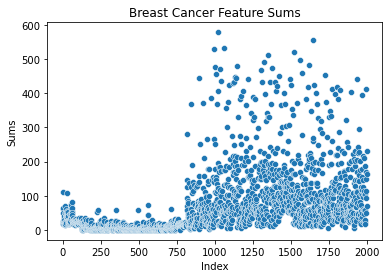

In [16]:
import seaborn as sns

sns.scatterplot(data=sums_df, x='Index', y='Sums').set(title='Breast Cancer Feature Sums')

In [17]:
first = column_sums[0:125]
first1 = column_names[0:125]
first_outliers = first1 * (first > 100)
first_outliers = first_outliers[first_outliers != '']
first_outliers

Index(['Fibrobl|DNase|None', 'Osteobl|DNase|None'], dtype='object')

In [18]:
np.percentile(column_sums, 99.9)

531.5846151260002

In [19]:
mask = column_sums > 270.3
np.count_nonzero(mask)

101

In [20]:
significant = mask * column_names 
np.count_nonzero(significant)

101

In [21]:
significant = significant[significant != '']
for j in significant:
    print(j)

ES-I3_Cell_Line|H3K36me3|None
H1-hESC|H3K36me3|None
H1_BMP4_Derived_Trophoblast_Cultured_Cells|H3K36me3|None
H1_Derived_Mesenchymal_Stem_Cells|H3K36me3|None
H9_Cell_Line|H3K36me3|None
H9_Derived_Neuronal_Progenitor_Cultured_Cells|H3K36me3|None
H9_Derived_Neuron_Cultured_Cells|H3K36me3|None
hESC_Derived_CD184+_Endoderm_Cultured_Cells|H3K36me3|None
hESC_Derived_CD56+_Ectoderm_Cultured_Cells|H3K36me3|None
hESC_Derived_CD56+_Mesoderm_Cultured_Cells|H3K36me3|None
HUES48_Cell_Line|H3K36me3|None
HUES6_Cell_Line|H3K36me3|None
HUES64_Cell_Line|H3K36me3|None
IMR90_Cell_Line|H3K36me3|None
IMR90_Cell_Line|H3K9me3|None
iPS-15b_Cell_Line|H3K36me3|None
iPS-18_Cell_Line|H3K36me3|None
iPS-20b_Cell_Line|H3K36me3|None
iPS_DF_19.11_Cell_Line|H3K36me3|None
Mesenchymal_Stem_Cell_Derived_Adipocyte_Cultured_Cells|H3K36me3|None
4star|H3K36me3|None
Adipose_Derived_Mesenchymal_Stem_Cell_Cultured_Cells|H3K36me3|None
Bone_Marrow_Derived_Mesenchymal_Stem_Cell_Cultured_Cells|H3K36me3|None
Breast_Myoepithelial_Cells|

Text(0.5, 1.0, 'Breast Cancer Gene Sums')

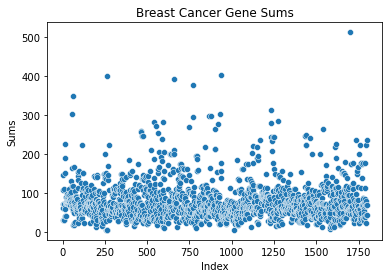

In [22]:
rows_df = pd.DataFrame()
rows_df['Sums'] = all_data[all_data.columns[1:]].sum(axis=1)
rows_df['Index'] = np.arange(len(rows_df['Sums']))
sns.scatterplot(data=rows_df, x='Index', y='Sums').set_title('Breast Cancer Gene Sums')

In [23]:
np.percentile(np.array(rows_df['Sums']), 95)

175.97797002420006

In [24]:
significant_rows = (np.array(all_data['name']) * (np.array(rows_df['Sums']) > 176))


In [25]:
significant_rows = significant_rows[significant_rows != '']


In [26]:
significant_rows, len(significant_rows)

(array(['HS3ST4', 'RBFOX1_ENST00000436368', 'CELF2_ENST00000636488',
        'CELF2_ENST00000637215', 'NRXN1_ENST00000628515', 'POU6F2',
        'HDAC9_ENST00000406451', 'NRXN3_ENST00000554719',
        'MAP2_ENST00000199940', 'CACNA1A_ENST00000637736',
        'CACNA1A_ENST00000636012', 'CACNA1A', 'CACNA1A_ENST00000573710',
        'HTR2C', 'RPTOR', 'CELF2', 'CELF2_ENST00000631816',
        'CELF2_ENST00000632065', 'RBFOX3', 'NRXN3_ENST00000335750',
        'RBFOX3_ENST00000583458', 'RBFOX3_ENST00000584778',
        'CELF2_ENST00000633077', 'KSR2', 'NLGN4X_ENST00000275857',
        'NLGN4X', 'NLGN4X_ENST00000381093', 'NLGN4X_ENST00000381092',
        'HDAC9_ENST00000432645', 'RUNX1_ENST00000399240',
        'LUZP2_ENST00000533227', 'FOXA1', 'AR_ENST00000396044',
        'AR_ENST00000612452', 'ATXN1', 'ATXN1_ENST00000436367', 'SCFD2',
        'POU6F2_ENST00000559001', 'CELF2_ENST00000631460',
        'CELF2_ENST00000416382', 'DLGAP2', 'PRKG1',
        'PRKG1_ENST00000646535', 'FMN2', '

In [27]:
for i in np.arange(len(significant_rows)):
    significant_rows[i] = significant_rows[i].partition('_')[0]

In [28]:
significant_rows

array(['HS3ST4', 'RBFOX1', 'CELF2', 'CELF2', 'NRXN1', 'POU6F2', 'HDAC9',
       'NRXN3', 'MAP2', 'CACNA1A', 'CACNA1A', 'CACNA1A', 'CACNA1A',
       'HTR2C', 'RPTOR', 'CELF2', 'CELF2', 'CELF2', 'RBFOX3', 'NRXN3',
       'RBFOX3', 'RBFOX3', 'CELF2', 'KSR2', 'NLGN4X', 'NLGN4X', 'NLGN4X',
       'NLGN4X', 'HDAC9', 'RUNX1', 'LUZP2', 'FOXA1', 'AR', 'AR', 'ATXN1',
       'ATXN1', 'SCFD2', 'POU6F2', 'CELF2', 'CELF2', 'DLGAP2', 'PRKG1',
       'PRKG1', 'FMN2', 'DLGAP2', 'NRG1', 'AUTS2', 'RUNX1', 'XKR4',
       'XKR4', 'CSMD2', 'CSMD2', 'CSMD2', 'RBFOX1', 'RBFOX1', 'RBFOX1',
       'RBFOX1', 'ARHGAP6', 'RBFOX1', 'RBFOX1', 'RBFOX1', 'RBFOX1',
       'RBFOX1', 'RBFOX1', 'RBFOX1', 'RBFOX1', 'SNTB1', 'CACNA1A',
       'CACNA1A', 'CACNA1A', 'CACNA1A', 'GALNT17', 'RUNX1', 'RUNX1',
       'FAM155A', 'GALNT17', 'SLIT3', 'ADARB2', 'RUNX1T1', 'FBXL17',
       'SLC2A13', 'HS6ST2', 'LUZP2', 'HS6ST2', 'NAV2', 'NAV2', 'NAV2',
       'NAV2', 'HS6ST2', 'HS6ST2'], dtype=object)

In [29]:
thresholded = pd.DataFrame()
thresholded['Thresholded'] = significant_rows
index = np.arange(len(thresholded))
thresholded['Index'] = index

In [30]:
thresholded = thresholded.groupby(['Thresholded'])['Thresholded'].value_counts().to_frame('Count')
thresholded.columns

Index(['Count'], dtype='object')

In [31]:
thresholded['Thresholded'] = thresholded.index.droplevel(1)
thresholded = thresholded.reset_index(drop=True)

In [32]:
thresholded

,Count,Thresholded
0,1,ADARB2
1,2,AR
2,1,ARHGAP6
3,2,ATXN1
4,1,AUTS2
5,8,CACNA1A
6,8,CELF2
7,3,CSMD2
8,2,DLGAP2
9,1,FAM155A


In [33]:
thresholded.to_csv('breast_cancer_prioritized.csv')